In [25]:
import streamlit as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr
plt.rcParams['figure.figsize'] = 10,10

import plotly.express as px
from sklearn import datasets
import random
from scipy.stats import multivariate_normal
from sklearn.preprocessing import normalize

In [2]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label'] = iris.target
target_names = {i:v for i,v in enumerate(iris.target_names)}
iris_df.label = iris_df.label.replace(target_names)

In [3]:
means = iris_df.groupby('label').mean()
means_dict = dict(zip(iris.target_names,means.values))

cov_all = np.cov(iris.data.T)
cov_classwise = iris_df.groupby('label').cov()
cov_dict={label:cov_classwise.loc[label].to_numpy() for label in iris.target_names}
cov_dict.update({'all':cov_all})

In [81]:
def likelihood(x,mu,cov,dim):
    assert cov.shape==(dim,dim)
    assert x.shape==mu.shape
    
    if x.shape[0]!=dim:
        x=x.T 
        mu=mu.T

    mah_distance = (x-mu).T.dot(np.linalg.inv(cov)).dot(x-mu)
    exp_component = np.exp(-0.5*mah_distance)
    norm_component = np.pi**(dim/2)*np.sqrt(np.linalg.det(cov))

    return exp_component/norm_component

In [82]:
likelihood_lda = pd.DataFrame(columns=iris.target_names)
likelihood_qda = pd.DataFrame(columns=iris.target_names)

for sp in iris.target_names:
    for i in range(iris.data.shape[0]):
        likelihood_lda.loc[i,sp]=likelihood(iris.data[i,:],means_dict[sp],cov_dict['all'],dim=4)

for sp in iris.target_names:
    for i in range(iris.data.shape[0]):
        likelihood_qda.loc[i,sp]=likelihood(iris.data[i,:],means_dict[sp],cov_dict[sp],dim=4)

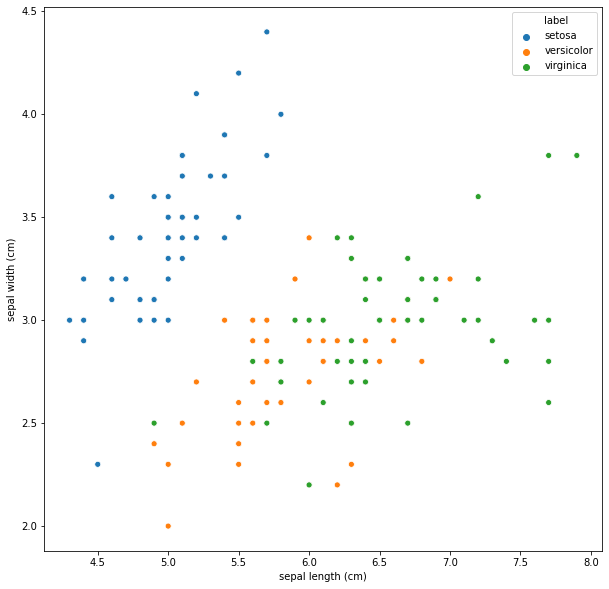

In [83]:
ax=sns.scatterplot(x=iris_df[iris.feature_names[0]], y=iris_df[iris.feature_names[1]], hue=iris_df.label);

In [87]:
list(zip(np.argmax(likelihood_qda.values,axis=1),iris_df.label))

[(0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (0, 'setosa'),
 (1, 'versicolor'),
 (1, 'versicolor'),
 (1, 'versicolor'),
 (1, 'versicolor'),
 (1, 'versicolor'),
 (1, 'versicolor'),
 (1, 'versicolor'),
 (1, 'versicolor'),
 (1, 'versicolor'),
 (1, 'versicolor'),


In [37]:
rgb=normalize(likelihood_lda,axis=1)

In [43]:
colors=[clr.rgb2hex(rgb[i]) for i in range(rgb.shape[0])]

In [84]:
contour_setosa = pd.DataFrame(columns=iris.feature_names,data=multivariate_normal.rvs(means_dict['setosa'],cov_dict['setosa'],size=1000))
contour_virginica = pd.DataFrame(columns=iris.feature_names,data=multivariate_normal.rvs(means_dict['virginica'],cov_dict['virginica'],size=1000))
contour_versicolor = pd.DataFrame(columns=iris.feature_names,data=multivariate_normal.rvs(means_dict['versicolor'],cov_dict['versicolor'],size=1000))

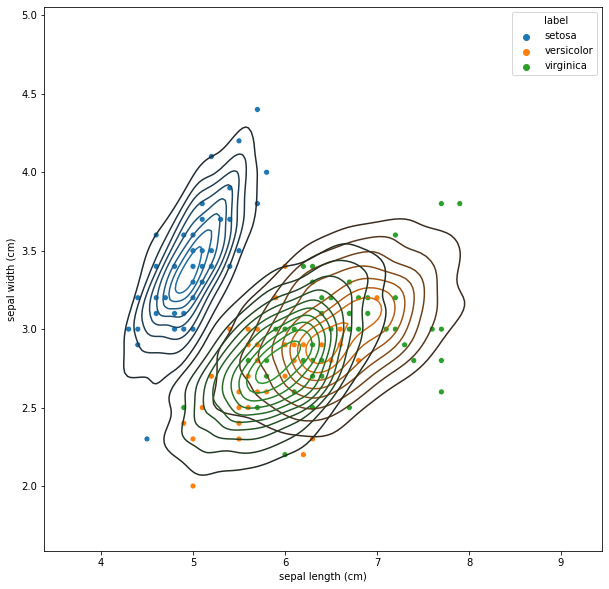

In [85]:
sns.scatterplot(x=iris_df[iris.feature_names[0]], y=iris_df[iris.feature_names[1]], hue=iris_df.label)
sns.kdeplot(contour_setosa[iris.feature_names[0]], contour_setosa[iris.feature_names[1]])
sns.kdeplot(contour_virginica[iris.feature_names[0]], contour_virginica[iris.feature_names[1]])
sns.kdeplot(contour_versicolor[iris.feature_names[0]], contour_versicolor[iris.feature_names[1]]);

In [58]:
contour_setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.144865,3.778770,1.442855,0.220408
1,4.753235,3.231241,1.584892,0.041638
2,4.850787,3.328392,1.320277,0.251857
3,5.094014,3.071791,1.733593,0.281400
4,4.840982,3.084043,1.631357,0.181612
...,...,...,...,...
995,4.616586,3.219310,1.425789,0.291940
996,4.809212,2.877321,1.416604,0.245511
997,4.914943,3.401622,1.374609,0.221422
998,4.947016,3.295300,1.644325,0.299304


In [65]:
x_min,x_max=ax.get_xlim()
y_min,y_max=ax.get_ylim()

In [67]:
N = 60
X = np.linspace(x_min,x_max, N)
Y = np.linspace(y_min,y_max, N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

In [74]:
pos[5,5,:]

array([4.45559322, 2.10372881])

In [78]:
m=means.loc['setosa',[iris.feature_names[0],iris.feature_names[1]]].values

In [80]:
(pos-m).shape

(60, 60, 2)